In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from tqdm import tqdm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

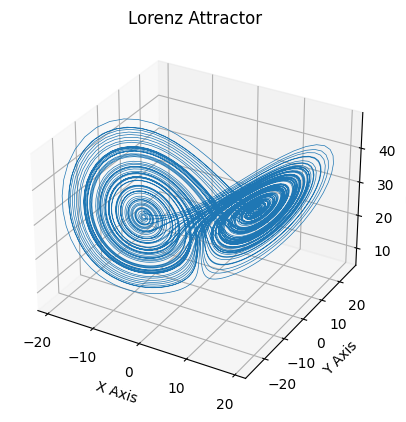

In [2]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])


dt = 0.01
num_steps = 10000

xyzs = np.empty((num_steps + 1, 3))  
xyzs[0] = (-8, 7, 27)  
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

ax = plt.figure().add_subplot(projection='3d')

ax.plot(*xyzs.T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

In [3]:
X_dot = 10 * (xyzs[:,1] - xyzs[:,0])
Y_dot = 28 * xyzs[:,0] - xyzs[:,1] - (xyzs[:,0] * xyzs[:,2])
Z_dot = (xyzs[:,0] * xyzs[:,1]) - 2.667 * xyzs[:,2]

xyzs_dot = np.stack((X_dot, Y_dot, Z_dot), axis = 1)
print(X_dot.shape, Y_dot.shape, Z_dot.shape, xyzs_dot.shape)

(10001,) (10001,) (10001,) (10001, 3)


In [4]:
poly = PolynomialFeatures(degree=2, include_bias=False)
polynomial_features = poly.fit_transform(xyzs)
output_feature_names = poly.get_feature_names_out(['x', 'y', 'z'])

print(polynomial_features.shape)
print(output_feature_names)

(10001, 9)
['x' 'y' 'z' 'x^2' 'x y' 'x z' 'y^2' 'y z' 'z^2']


In [5]:
model = LinearRegression()
model.fit(polynomial_features, xyzs_dot[:,0].squeeze(), )

for i in range(len(model.coef_)):
    print(f'Coefficient of ' + str(output_feature_names[i]) + ' : ' + str(model.coef_[i]))

Coefficient of x : -9.999999999999845
Coefficient of y : 9.999999999999991
Coefficient of z : -1.4387884608347226e-14
Coefficient of x^2 : 2.259599108094919e-15
Coefficient of x y : -1.9730686471250792e-16
Coefficient of x z : -1.272336848931795e-15
Coefficient of y^2 : -7.398742345883747e-16
Coefficient of y z : -6.667797839694765e-16
Coefficient of z^2 : -6.961915926510713e-17


In [6]:
model = LinearRegression()
model.fit(polynomial_features, xyzs_dot[:,1].squeeze())

for i in range(len(model.coef_)):
    print(f'Coefficient of ' + str(output_feature_names[i]) + ' : ' + str(model.coef_[i]))

Coefficient of x : 27.999999999999936
Coefficient of y : -0.9999999999999927
Coefficient of z : 4.151310648226882e-14
Coefficient of x^2 : 8.513616636354537e-15
Coefficient of x y : -7.545164747931023e-15
Coefficient of x z : -0.9999999999999998
Coefficient of y^2 : 1.3009687344375954e-16
Coefficient of y z : -4.476326668903013e-16
Coefficient of z^2 : -1.3704653836028163e-15


In [7]:
model = LinearRegression()
model.fit(polynomial_features, xyzs_dot[:,2].squeeze())

for i in range(len(model.coef_)):
    print(f'Coefficient of ' + str(output_feature_names[i]) + ' : ' + str(model.coef_[i]))

Coefficient of x : 8.434314895729321e-15
Coefficient of y : -1.0924421089963943e-15
Coefficient of z : -2.6670000000000047
Coefficient of x^2 : -8.772866397274724e-16
Coefficient of x y : 1.0000000000000009
Coefficient of x z : 1.9211835093654492e-16
Coefficient of y^2 : 2.664186540235101e-16
Coefficient of y z : -4.800522846910655e-16
Coefficient of z^2 : -8.560552480500557e-17
